<a href="https://colab.research.google.com/github/snig-17/QM-GRUNGE/blob/main/clairedatavisual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

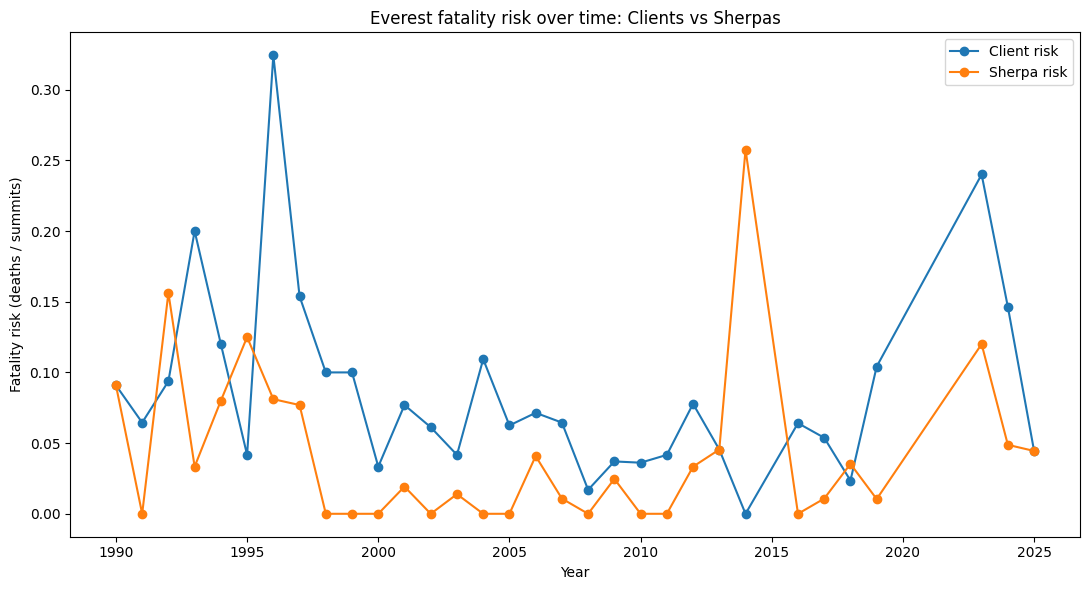

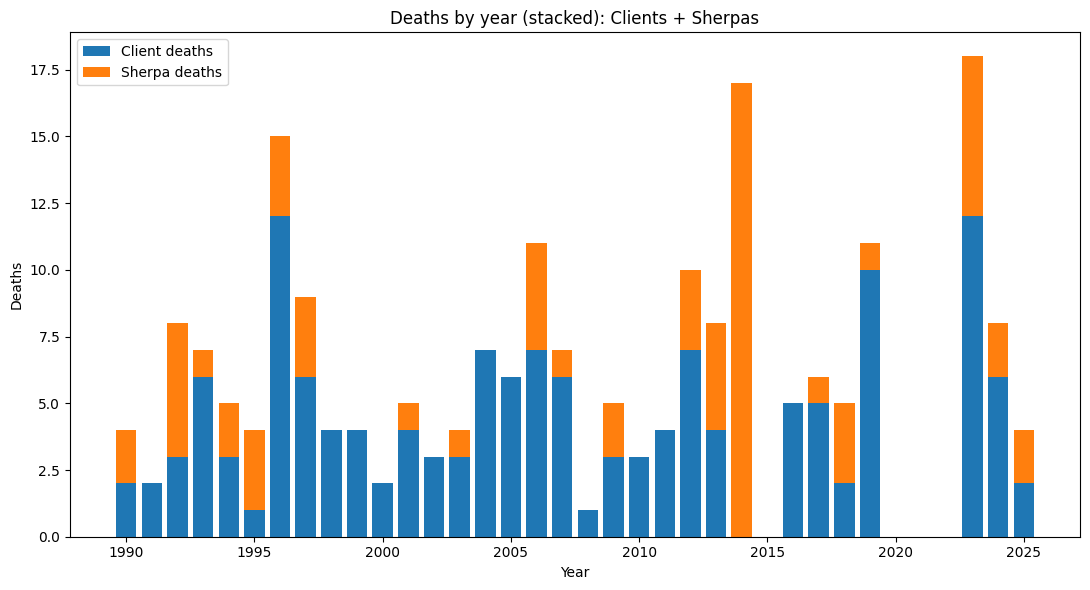

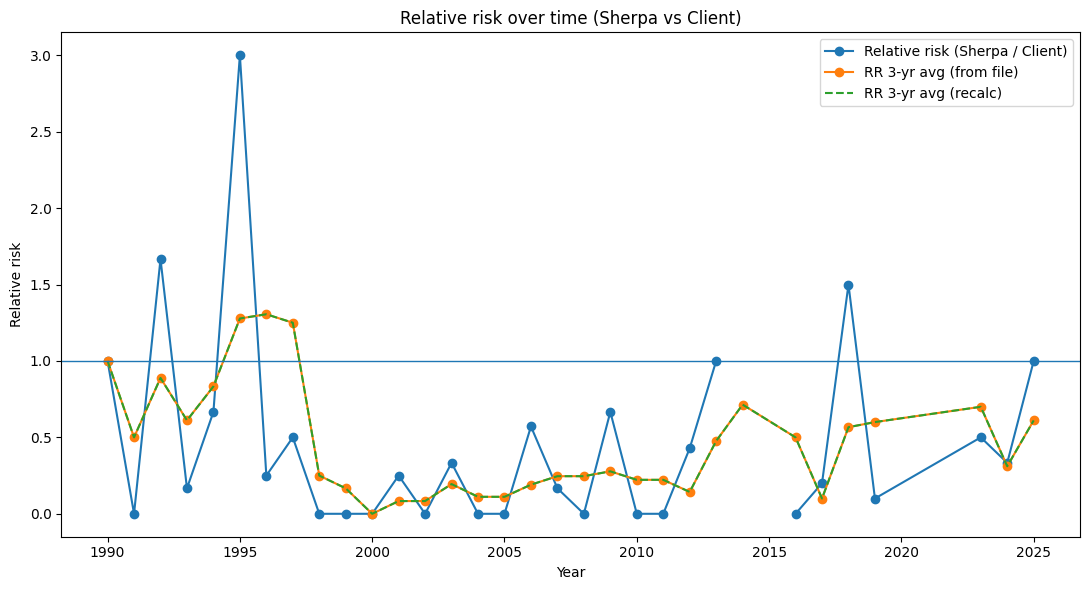

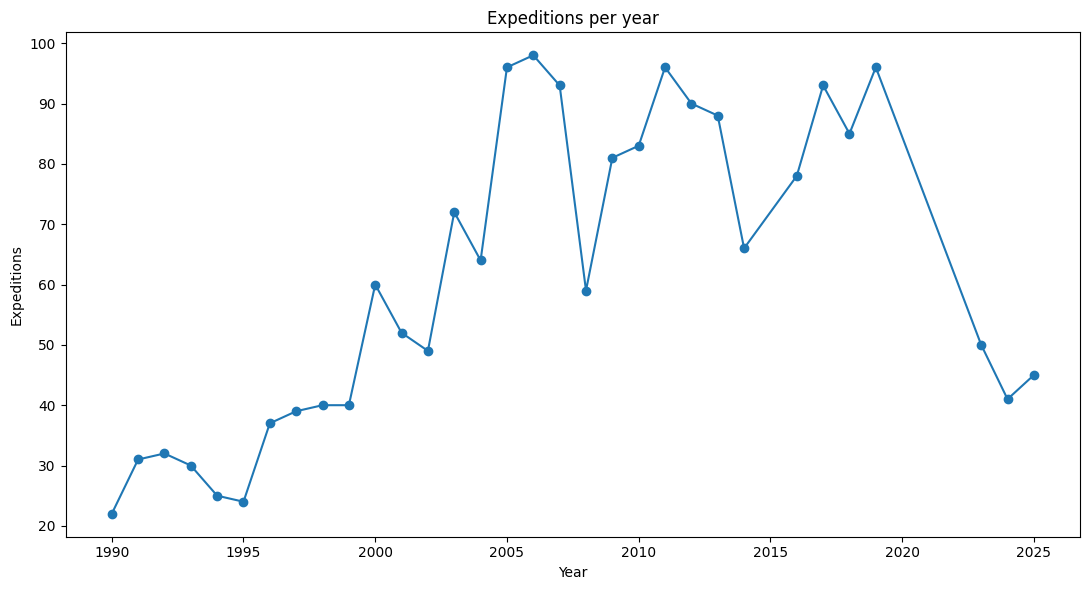

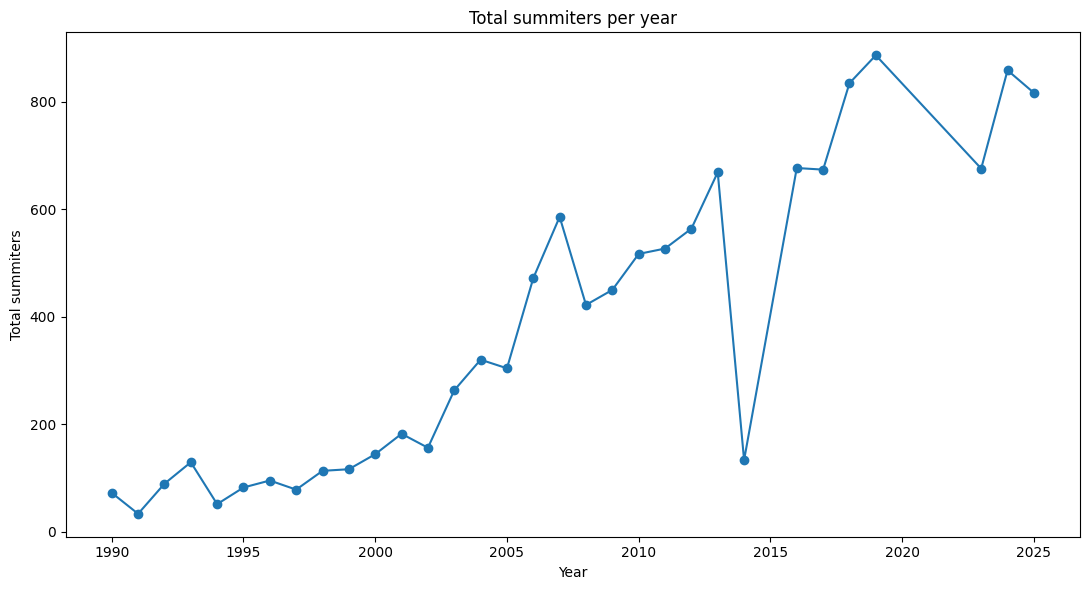

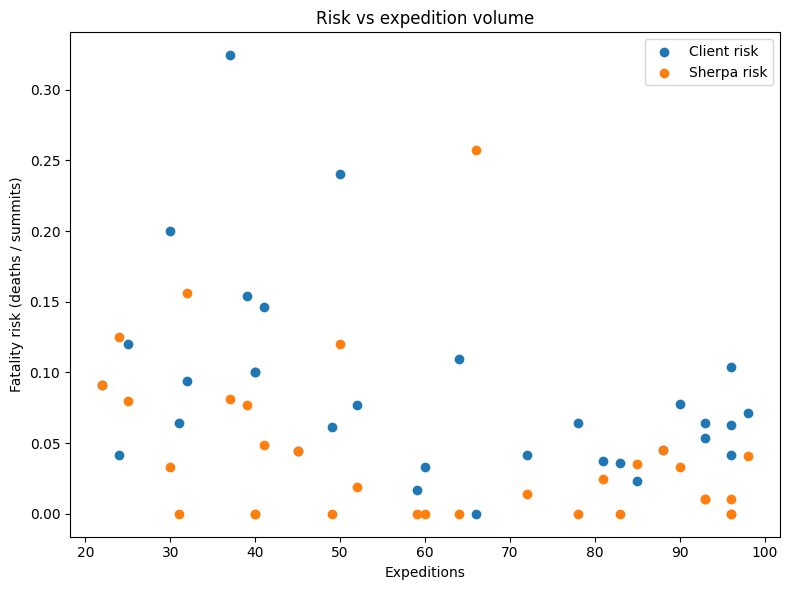

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load + validate columns ---
df = pd.read_csv("everest_analysis_table.csv")
df.columns = [c.strip() for c in df.columns]

expected = [
    "Year","Expeditions","Total_Summiters",
    "Client_deaths","Sherpa_deaths",
    "Client_risk","Sherpa_risk",
    "Relative_risk","RR_3yr_avg"
]
missing = [c for c in expected if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in CSV: {missing}\nFound: {df.columns.tolist()}")

# Ensure correct dtypes + ordering
df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")
for c in expected[1:]:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df = df.dropna(subset=["Year"]).sort_values("Year").reset_index(drop=True)

# Optional: recompute RR_3yr_avg if you want it guaranteed from Relative_risk
# (keeps existing values if already correct)
df["RR_3yr_avg_recalc"] = df["Relative_risk"].rolling(3, min_periods=1).mean()

# -------------------------------
# 1) Line chart: Client vs Sherpa risk over time
# -------------------------------
plt.figure(figsize=(11, 6))
plt.plot(df["Year"], df["Client_risk"], marker="o", label="Client risk")
plt.plot(df["Year"], df["Sherpa_risk"], marker="o", label="Sherpa risk")
plt.xlabel("Year")
plt.ylabel("Fatality risk (deaths / summits)")
plt.title("Everest fatality risk over time: Clients vs Sherpas")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 2) Bar chart: Deaths by year (stacked)
# -------------------------------
plt.figure(figsize=(11, 6))
plt.bar(df["Year"], df["Client_deaths"], label="Client deaths")
plt.bar(df["Year"], df["Sherpa_deaths"], bottom=df["Client_deaths"], label="Sherpa deaths")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Deaths by year (stacked): Clients + Sherpas")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 3) Line chart: Relative risk + 3-year rolling average
# -------------------------------
plt.figure(figsize=(11, 6))
plt.plot(df["Year"], df["Relative_risk"], marker="o", label="Relative risk (Sherpa / Client)")
plt.plot(df["Year"], df["RR_3yr_avg"], marker="o", label="RR 3-yr avg (from file)")
plt.plot(df["Year"], df["RR_3yr_avg_recalc"], linestyle="--", label="RR 3-yr avg (recalc)")
plt.axhline(1.0, linewidth=1)  # baseline: equal risk
plt.xlabel("Year")
plt.ylabel("Relative risk")
plt.title("Relative risk over time (Sherpa vs Client)")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 4) Context chart: Expeditions + Total summiters (two plots, not dual-axis)
# -------------------------------
plt.figure(figsize=(11, 6))
plt.plot(df["Year"], df["Expeditions"], marker="o")
plt.xlabel("Year")
plt.ylabel("Expeditions")
plt.title("Expeditions per year")
plt.tight_layout()
plt.show()

plt.figure(figsize=(11, 6))
plt.plot(df["Year"], df["Total_Summiters"], marker="o")
plt.xlabel("Year")
plt.ylabel("Total summiters")
plt.title("Total summiters per year")
plt.tight_layout()
plt.show()

# -------------------------------
# 5) Scatter: Expedition volume vs risk (helps show correlation)
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(df["Expeditions"], df["Client_risk"], label="Client risk")
plt.scatter(df["Expeditions"], df["Sherpa_risk"], label="Sherpa risk")
plt.xlabel("Expeditions")
plt.ylabel("Fatality risk (deaths / summits)")
plt.title("Risk vs expedition volume")
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
!pip install pydeck
import pydeck as pdk
import pandas as pd

# Everest routes with approximate elevations (meters)
data = [
    # South Col route
    ("South Col", "EBC Nepal", 28.0026, 86.8528, 5364),
    ("South Col", "Khumbu Icefall", 27.9950, 86.8550, 5800),
    ("South Col", "Camp II", 27.9865, 86.8425, 6400),
    ("South Col", "South Col", 27.9729, 86.9300, 7900),
    ("South Col", "Summit", 27.9881, 86.9250, 8849),

    # North Col route
    ("North Col", "EBC Tibet", 28.1425, 86.8510, 5200),
    ("North Col", "ABC", 28.0950, 86.8700, 6400),
    ("North Col", "North Col", 28.0200, 86.9100, 7000),
    ("North Col", "NE Ridge Camp", 28.0100, 86.9200, 8300),
    ("North Col", "Summit", 27.9881, 86.9250, 8849),
]

df = pd.DataFrame(data, columns=["route", "point", "lat", "lon", "elev"])

layer = pdk.Layer(
    "LineLayer",
    data=df,
    get_source_position="[lon, lat, elev]",
    get_target_position="[lon, lat, elev]",
    get_color=[220, 20, 60],
    get_width=6,
    pickable=True,
)

view = pdk.ViewState(
    latitude=27.9881,
    longitude=86.9250,
    zoom=9,
    pitch=65,      # <- THIS makes it 3D
    bearing=0,
)

deck = pdk.Deck(
    layers=[layer],
    initial_view_state=view,
    tooltip={"text": "{route}\n{point}\nElevation: {elev} m"},
)

deck.to_html("everest_3d_routes.html")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.9 MB/s eta 0:00:00


<IPython.core.display.Javascript object>